# Import Libraries

In [1]:
import numpy as np
import pandas as pd

# Import Most Important Features

In [2]:
abs_features = pd.read_csv("all.csv", header=None)
pos_features = pd.read_csv("pos.csv", header=None)
neg_features = pd.read_csv("neg.csv", header=None)

In [3]:
all_classes = ["Bone-Osteosarc","Breast-AdenoCA","CNS-GBM","CNS-Medullo","CNS-PiloAstro","ColoRect-AdenoCA","Eso-AdenoCA","Head-SCC","Kidney-ChRCC","Kidney-RCC","Liver-HCC","Lung-AdenoCA","Lung-SCC","Lymph-BNHL","Lymph-CLL","Myeloid-MPN","Ovary-AdenoCA","Panc-AdenoCA","Panc-Endocrine","Prost-AdenoCA","Skin-Melanoma","Stomach-AdenoCA","Thy-AdenoCA","Uterus-AdenoCA"]

In [4]:
 def get_jaccard(x):
    builder = ","
    for i in range(24):
        if (i != 23):
            builder += all_classes[i] + ","
        else:
            builder += all_classes[i] + '\n'
    
    for i in range(24):
        builder += all_classes[i] + ","
        for j in range(24):
            inters = set(x.iloc[i,:]).intersection(set(x.iloc[j,:]))
            uni = set(x.iloc[i,:]).union(set(x.iloc[j,:]))
            if (j == i):
                builder += "0.0"
            else:
                builder += str(len(inters)/len(uni))
                
            if (j != 23):
                builder += ","
            else:
                builder += "\n"
            
    return builder

# Calculate and Save all Jaccard Pairwise

In [5]:
with open("alljac.csv", "w") as text_file:
    text_file.write(get_jaccard(abs_features))

In [6]:
with open("posjac.csv", "w") as text_file:
    text_file.write(get_jaccard(pos_features))

In [7]:
with open("negjac.csv", "w") as text_file:
    text_file.write(get_jaccard(neg_features))

# Graph Heatmaps for Both Positive and Negative Scores

In [11]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.dpi'] = 144

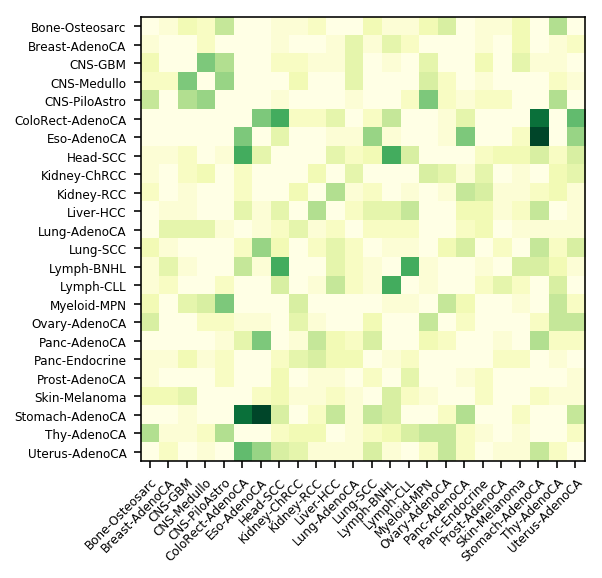

In [12]:
x = pd.read_csv("posjac.csv")
matplotlib.rcParams.update({'font.size': 6})
newx  = x.drop("Unnamed: 0", axis=1)
fig, ax = plt.subplots()
im = ax.imshow(newx, cmap="YlGn")

ax.set_xticks(np.arange(len(newx.columns.values)))
ax.set_yticks(np.arange(len(newx.columns.values)))


ax.set_xticklabels(newx.columns.values)
ax.set_yticklabels(newx.columns.values)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()

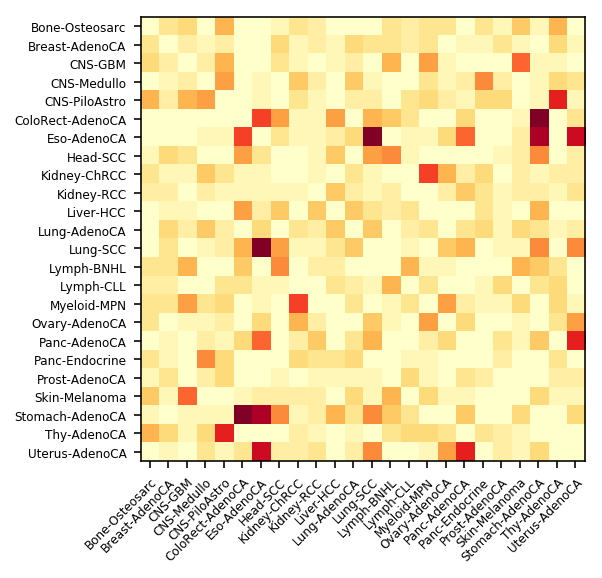

In [13]:
x = pd.read_csv("negjac.csv")
matplotlib.rcParams.update({'font.size': 6})
newx  = x.drop("Unnamed: 0", axis=1)
fig, ax = plt.subplots()
im = ax.imshow(newx, cmap="YlOrRd")

ax.set_xticks(np.arange(len(newx.columns.values)))
ax.set_yticks(np.arange(len(newx.columns.values)))


ax.set_xticklabels(newx.columns.values)
ax.set_yticklabels(newx.columns.values)


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

fig.tight_layout()
plt.show()